# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Temperature units
units = 'Imperial'

# Output File (CSV)
output_data_file = "weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_lats = []
city_lngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lats.append(lat_lng[0])
        city_lngs.append(lat_lng[1])

# Print the city count to confirm sufficient count

print(len(cities))
print(len(city_lats))
print(len(city_lngs))

624
624
624


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
temps = []
humidities = []
clouds = []
wind = []

for city in cities:
    target_city = city
    target_url = f'{base_url}q={target_city}&appid={weather_key}&units={units}'
    target_city_index = cities.index(city) + 1
    city_data = requests.get(target_url).json()
    
    print(f'#{target_city_index} - Getting data from {target_city}')
    try:
        temps.append(city_data['main']['temp'])
    except:
        temps.append("NAN")
        print(f'No temperature data for {target_city}, skipping...')
        
    try:
        humidities.append(city_data['main']['humidity'])
    except:
        humidities.append("NAN")
        print(f'No humidity data for {target_city}, skipping...')
        
    try:
        clouds.append(city_data['clouds']['all'])
    except:
        clouds.append("NAN")
        print(f'No cloud coverage data for {target_city}, skipping...')

    try:
        wind.append(city_data['wind']['speed'])
    except:
        wind.append("NAN")
        print(f'No wind data for {target_city}, skipping...')
        
print(len(temps))
print(len(humidities))
print(len(clouds))
print(len(wind))

#0 - Getting data from morondava
#1 - Getting data from adrar
#2 - Getting data from bluff
#3 - Getting data from chuy
#4 - Getting data from hilo
#5 - Getting data from katsuura
#6 - Getting data from port alfred
#7 - Getting data from caravelas
#8 - Getting data from illoqqortoormiut
No temperature data for illoqqortoormiut, skipping...
No humidity data for illoqqortoormiut, skipping...
No cloud coverage data for illoqqortoormiut, skipping...
No wind data for illoqqortoormiut, skipping...
#9 - Getting data from new norfolk
#10 - Getting data from rikitea
#11 - Getting data from manakara
#12 - Getting data from ushuaia
#13 - Getting data from belushya guba
No temperature data for belushya guba, skipping...
No humidity data for belushya guba, skipping...
No cloud coverage data for belushya guba, skipping...
No wind data for belushya guba, skipping...
#14 - Getting data from cape town
#15 - Getting data from yadgir
#16 - Getting data from ribeira grande
#17 - Getting data from tolmezzo


#165 - Getting data from saint paul
#166 - Getting data from thilogne
No temperature data for thilogne, skipping...
No humidity data for thilogne, skipping...
No cloud coverage data for thilogne, skipping...
No wind data for thilogne, skipping...
#167 - Getting data from huarmey
#168 - Getting data from maragogi
#169 - Getting data from katherine
#170 - Getting data from nantucket
#171 - Getting data from vredendal
#172 - Getting data from maarianhamina
#173 - Getting data from mahebourg
#174 - Getting data from anshun
#175 - Getting data from truth or consequences
#176 - Getting data from churachandpur
#177 - Getting data from talcahuano
#178 - Getting data from saint-philippe
#179 - Getting data from dunedin
#180 - Getting data from ahipara
#181 - Getting data from vila velha
#182 - Getting data from lavrentiya
#183 - Getting data from verkhneyarkeyevo
#184 - Getting data from ancud
#185 - Getting data from arman
#186 - Getting data from college
#187 - Getting data from sentyabrskiy


#329 - Getting data from ponta delgada
#330 - Getting data from presidencia roque saenz pena
#331 - Getting data from evensk
#332 - Getting data from tonj
#333 - Getting data from texarkana
#334 - Getting data from karasjok
#335 - Getting data from madera
#336 - Getting data from qui nhon
#337 - Getting data from mitchell
#338 - Getting data from shanting
#339 - Getting data from imbituba
#340 - Getting data from marcona
No temperature data for marcona, skipping...
No humidity data for marcona, skipping...
No cloud coverage data for marcona, skipping...
No wind data for marcona, skipping...
#341 - Getting data from ordu
#342 - Getting data from severo-kurilsk
#343 - Getting data from cheremukhovo
#344 - Getting data from boa vista
#345 - Getting data from abha
#346 - Getting data from saint marys
#347 - Getting data from gavle
#348 - Getting data from tuatapere
#349 - Getting data from sandwick
#350 - Getting data from natal
#351 - Getting data from songjianghe
#352 - Getting data from

#506 - Getting data from eldikan
No temperature data for eldikan, skipping...
No humidity data for eldikan, skipping...
No cloud coverage data for eldikan, skipping...
No wind data for eldikan, skipping...
#507 - Getting data from mazyr
#508 - Getting data from rio gallegos
#509 - Getting data from griffith
#510 - Getting data from andenes
#511 - Getting data from pochutla
#512 - Getting data from oranjemund
#513 - Getting data from ust-nera
#514 - Getting data from nandyal
#515 - Getting data from quatre cocos
#516 - Getting data from bolivar
#517 - Getting data from grand gaube
#518 - Getting data from biltine
#519 - Getting data from savannakhet
#520 - Getting data from kayerkan
#521 - Getting data from ondjiva
#522 - Getting data from cotonou
#523 - Getting data from hemnesberget
#524 - Getting data from lorengau
#525 - Getting data from waitati
#526 - Getting data from amasya
#527 - Getting data from qandala
#528 - Getting data from lazaro cardenas
#529 - Getting data from boralda

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
weather_df = pd.DataFrame({'City': cities, 'Latitude': city_lats, 'Longitude': city_lngs, 'Temperature \N{DEGREE SIGN}F': temps, 'Humidity (%)': humidities, 'Cloud Coverage (%)': clouds, 'Wind Speed (MPH)': wind})
weather_df['City'] = weather_df['City'].str.title()

weather_df['Temperature \N{DEGREE SIGN}F'] = weather_df['Temperature \N{DEGREE SIGN}F'].astype(float)
weather_df['Humidity (%)'] = weather_df['Humidity (%)'].astype(float)
weather_df['Cloud Coverage (%)'] = weather_df['Cloud Coverage (%)'].astype(float)
weather_df['Wind Speed (MPH)'] = weather_df['Wind Speed (MPH)'].astype(float)
# weather_df.dtypes

In [20]:
weather_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
humid_100 = weather_df.loc[weather_df['Humidity (%)'] >= 100]
print(f'There are {len(humid_100)} cities where the humidity is greater than 100%')
print(f'Dropping these {len(humid_100)} cities')
weather_df = weather_df.loc[weather_df['Humidity (%)'] < 100]
print(f'There are now {len(weather_df)} cities in the dataframe.')

There are 12 cities where the humidity is greater than 100%
Dropping these 12 cities
There are now 563 cities in the dataframe.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

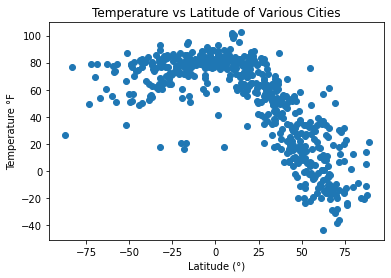

The data unsuprisingly shows that the temperature increases as you near the equator (0° latitude).
If there was more data points in the southern hemisphere (< 0° latitude), this upside-down "u" shape would likely continue.


In [34]:
plt.scatter(weather_df['Latitude'], weather_df['Temperature \N{DEGREE SIGN}F'])
plt.title('Temperature vs Latitude of Various Cities')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Temperature \N{DEGREE SIGN}F')
plt.show()
print('The data unsuprisingly shows that the temperature increases as you near the equator (0\N{DEGREE SIGN} latitude).')
print('If there was more data points in the southern hemisphere (< 0\N{DEGREE SIGN} latitude), this upside-down "u" shape would likely continue.')

## Latitude vs. Humidity Plot

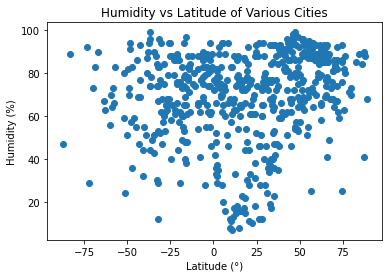

According to this sample, there does not seem to be a clear relationship between latitude and humidity.
Humidity is likely related to either longitude, altitude, current weather or other factors.


In [36]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity (%)'])
plt.title('Humidity vs Latitude of Various Cities')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Humidity (%)')
plt.show()
print('According to this sample, there does not seem to be a clear relationship between latitude and humidity.')
print('Humidity is likely related to either longitude, altitude, current weather or other factors.')

## Latitude vs. Cloudiness Plot

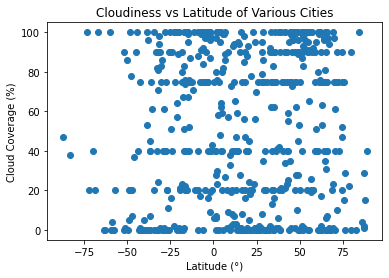

According to this sample, there does not seem to be a clear relationship between latitude and cloudiness.
Cloudiness is likely related to either longitude, altitude, current weather or other factors.


In [40]:
plt.scatter(weather_df['Latitude'], weather_df['Cloud Coverage (%)'])
plt.title('Cloudiness vs Latitude of Various Cities')
plt.xlabel('Latitude (\N{DEGREE SIGN})')
plt.ylabel('Cloud Coverage (%)')
plt.show()
print('According to this sample, there does not seem to be a clear relationship between latitude and cloudiness.')
print('Cloudiness is likely related to either longitude, altitude, current weather or other factors.')

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression